In [1]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load dataset
data = pd.read_csv('data.csv', delimiter=';')

# preprocess

# check if there is missing value
data.isnull().sum()

# encoding categorical variable
# Dropout -> 0, Enrolled -> 1, Graduate -> 1
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# change column name Nacionality to Nationality
X.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# change Nationality value 1 to 1, all other to 0
X['Nationality'] = X['Nationality'].apply(lambda x: 1 if x == 1 else 0)

# drop Gender column to avoid discrimination
X = X.drop(['Gender'], axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Num Features: 35, Accuracy: 0.875389
Num Features: 1, Accuracy: 0.802490
Num Features: 2, Accuracy: 0.781861
Num Features: 3, Accuracy: 0.802773
Num Features: 4, Accuracy: 0.811250
Num Features: 5, Accuracy: 0.821142
Num Features: 6, Accuracy: 0.828768
Num Features: 7, Accuracy: 0.841767
Num Features: 8, Accuracy: 0.865500
Num Features: 9, Accuracy: 0.871435
Num Features: 10, Accuracy: 0.870303
Num Features: 11, Accuracy: 0.874541
Num Features: 12, Accuracy: 0.873131
Num Features: 13, Accuracy: 0.875956
Num Features: 14, Accuracy: 0.877650
Num Features: 15, Accuracy: 0.878784
Num Features: 16, Accuracy: 0.872848
Num Features: 17, Accuracy: 0.874826
Num Features: 18, Accuracy: 0.876523
Num Features: 19, Accuracy: 0.872564
Num Features: 20, Accuracy: 0.877652
Num Features: 21, Accuracy: 0.879348
Num Features: 22, Accuracy: 0.875107
Num Features: 23, Accuracy: 0.879346
Num Features: 24, Accuracy: 0.877087
Num Features: 25, Accuracy: 0.875391
Num Features: 26, Accuracy: 0.873980
Num Featur

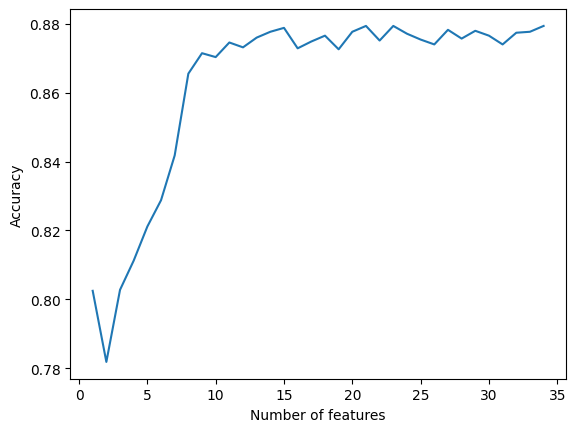

In [2]:
# loop through the # of features to select and plot the accuracy

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

# first calculate the accuracy for all features
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Num Features: %d, Accuracy: %f" % (X_train.shape[1], scores.mean()))

rfe_scores = []

for n in range(1, X.shape[1]):
    rfe = RFE(RandomForestClassifier(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    X_train_selected = X_train[X_train.columns[rfe.support_]]

    model = RandomForestClassifier()
    scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))
    rfe_scores.append(scores.mean())

plt.plot(range(1, X_train.shape[1]), rfe_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

In [3]:
# finally test the model on test set
n_features = 12
rfe = RFE(RandomForestClassifier(), n_features_to_select=n_features)
rfe.fit(X_train, y_train)
X_train_selected = X_train[X_train.columns[rfe.support_]]
X_test_selected = X_test[X_test.columns[rfe.support_]]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))


0.847457627118644


c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


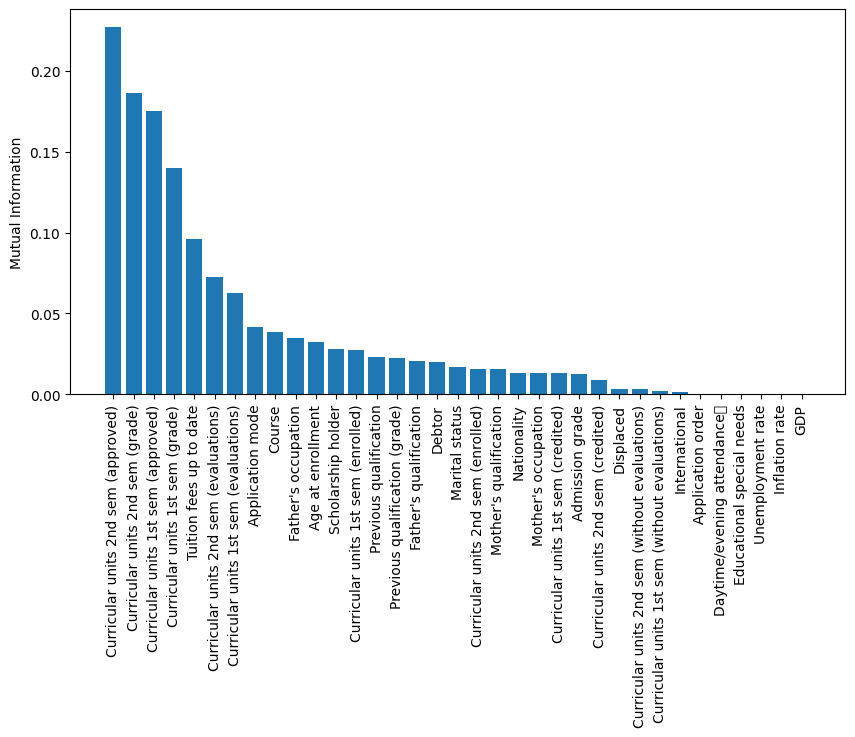

In [4]:
# feature selection using Mutual Information

from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)

# sort the mutual information in non-ascending order
mutual_info = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)
# sort the columns in non-ascending order
X_train_sorted = X_train[mutual_info.index]

# plot the mutual information in non-ascending order
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(X_train_sorted.columns, mutual_info)
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()


Num Features: 1, Accuracy: 0.836678
Num Features: 2, Accuracy: 0.813508
Num Features: 3, Accuracy: 0.818028
Num Features: 4, Accuracy: 0.818029
Num Features: 5, Accuracy: 0.847416
Num Features: 6, Accuracy: 0.856457
Num Features: 7, Accuracy: 0.856175
Num Features: 8, Accuracy: 0.862108
Num Features: 9, Accuracy: 0.868046
Num Features: 10, Accuracy: 0.868891
Num Features: 11, Accuracy: 0.870590
Num Features: 12, Accuracy: 0.874261
Num Features: 13, Accuracy: 0.873978
Num Features: 14, Accuracy: 0.876238
Num Features: 15, Accuracy: 0.873129
Num Features: 16, Accuracy: 0.876239
Num Features: 17, Accuracy: 0.875392
Num Features: 18, Accuracy: 0.873131
Num Features: 19, Accuracy: 0.875109
Num Features: 20, Accuracy: 0.880477
Num Features: 21, Accuracy: 0.875674
Num Features: 22, Accuracy: 0.877651
Num Features: 23, Accuracy: 0.880195
Num Features: 24, Accuracy: 0.874825
Num Features: 25, Accuracy: 0.878217
Num Features: 26, Accuracy: 0.879913
Num Features: 27, Accuracy: 0.874824
Num Featur

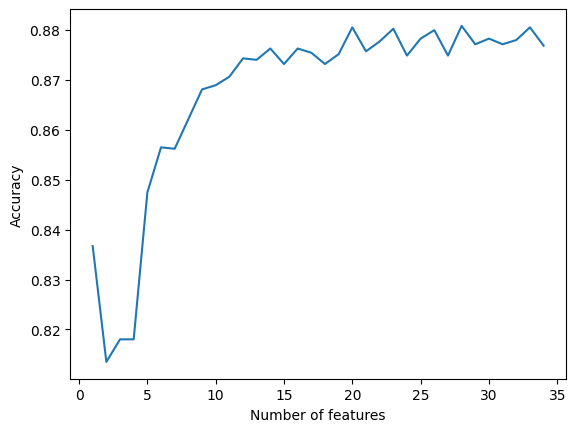

In [5]:
# check the accuracy with the top N features

mi_scores = []
for n in range(1, X.shape[1]):
    X_selected = X_train_sorted[X_train_sorted.columns[:n]]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5)
    mi_scores.append(scores.mean())
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))

plt.plot(range(1, X.shape[1]), mi_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()


In [6]:
# test it on X_test
n_features = 12
X_train_selected = X_train_sorted[X_train_sorted.columns[:n_features]]
X_test_sorted = X_test[mutual_info.index]
X_test_selected = X_test_sorted[X_test_sorted.columns[:n_features]]
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
print(model.score(X_test_selected, y_test))

0.8418079096045198
